# Data Analysis and Data Visualization
- A dataset (WHO World Health Statistics 2020) is uploaded from Kaggle 
- It consists of health related data, mainly dealing with disease prevalence, health expenditure, social and economic effects on health, life expectancy and mortality rates in different regions of the world. 
- Some of these datasets are analyzed to form and identify existing patterns between them. 

In [1]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#Importing Datasets 
lifeExpect  = pd.read_csv('lifeExpectancy.csv')
waterAccess = pd.read_csv('basicDrinkingWaterServices.csv')
tb = pd.read_csv('incedenceOfTuberculosis.csv')
dr = pd.read_csv('medicalDoctors.csv')
malaria = pd.read_csv('incedenceOfMalaria.csv')

In [5]:
#printing a few rows of each dataset to check the column names and modify later on
lifeExpect.head(3)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16


In [7]:
waterAccess.head(4)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96


In [9]:
tb.head(4)

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]


In [11]:
dr.head(4)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85


In [13]:
malaria.head(4)

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91


In [15]:
#renaming columns
lifeExpect.columns = ('Country', 'Year', 'detail', 'gender','Value')
waterAccess.columns = ('Country', 'Year', 'detail', 'Value')
dr.columns = ('Country', 'Year', 'detail', 'Value')
tb.columns = ('Country', 'detail','Year', 'Value')
malaria.columns = ('Country', 'detail', 'Year', 'Value')
malaria.head(3)

,Country,detail,Year,Value
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11


### Cleaning and organizing the dataset
- Customizing a dataset that only deals with specific columns.
- Dropping the rows with missing values.
- Converting string type values to Integers for calculations 

In [18]:
 #defining a function cleaning_data 
def cleaning_data (df, value_col):
    df = df [['Country', 'Year', value_col]]     #keeping necessary columns 
    df = df.dropna()                             #dropping rows with missing values
    df[value_col] = df[value_col].astype(str).str.extract(r'(\d+\.?\d*)')[0]       #at the bottom of the cell
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    df = df.groupby('Country', as_index=False)[value_col].mean()
    return df                                    #gives back clean dataset whenever fn is called 

#.astype(str), converts the values of a column to strings
#.str.extract, extracts a specific pattern from strings
#(r'(\d+\.?\d*)'), (\d+) Matches one or more digits (\.?) Matches decimal point (?) means zero or one decimal point (\d*) Matches zero/digits after the decimal point 
#[0] Selecting the first column from results
#pd.to_numeric, convert string to numeric value, eg('10' to 10 )
#error='coerce', this parameter replace the value to nan if it cannot be converted into numeric 

In [20]:
#Applying the created function 
lifeExpect = cleaning_data (lifeExpect, 'Value')
waterAccess = cleaning_data (waterAccess, 'Value')
dr = cleaning_data (dr, 'Value')
tb = cleaning_data (tb, 'Value')
malaria = cleaning_data (malaria, 'Value')

In [22]:
# To deal with data for only one year we filter it
# This makes it easier to compare 
#to improve our analysis we can also deal with different years and compare 
#yr = 2012
#lifeExpect = lifeExpect [lifeExpect ['Year'] == yr]
#waterAccess = waterAccess [waterAccess ['Year'] ==yr]
#tb = tb [tb ['Year'] == yr]
#dr = dr [dr ['Year'] == yr]
#lifeExpect.head()

In [30]:
#merging the data based on country 
mergedata = lifeExpect.merge (waterAccess, on = 'Country', suffixes= ('_avglife', 'water')).merge(tb, on='Country').merge(dr, on='Country',suffixes=('_tB','_doc')).merge(malaria, on='Country')
mergedata.head(4)

,Country,Value_avglife,Valuewater,Value_tB,Value_doc,Value
0,Afghanistan,59.960000,37.755000,189.05,2.322500,34.903158
1,Algeria,75.454167,86.305000,73.55,14.450000,0.004000
2,Angola,58.100000,24.313889,359.30,1.167500,250.115789
3,Argentina,75.537500,87.365556,28.40,34.327143,0.574105


In [32]:
#now we will rename the columns for more clarity
mergedata.columns = ['Country', 'Life_Expectancy', 'Water_Access','Tb_incidence', 'Doctors', 'Malaria_Incidences']
mergedata

,Country,Life_Expectancy,Water_Access,Tb_incidence,Doctors,Malaria_Incidences
0,Afghanistan,59.960000,37.755000,189.05,2.322500,34.903158
1,Algeria,75.454167,86.305000,73.55,14.450000,0.004000
2,Angola,58.100000,24.313889,359.30,1.167500,250.115789
3,Argentina,75.537500,87.365556,28.40,34.327143,0.574105
4,Armenia,73.783333,94.861667,57.70,20.320741,0.006158
...,...,...,...,...,...,...
102,Venezuela (Bolivarian Republic of),74.444167,96.187778,32.65,19.480000,7.960526
103,Viet Nam,72.811667,83.970556,235.65,6.880000,0.826000
104,Yemen,66.151667,40.171667,66.50,3.484000,40.840526
105,Zambia,56.016667,36.503889,516.60,2.103000,237.784211


## Correlation 
### Understanding how each of these health metrics correlate with each other. 
- We will use a heat map to visualize the correlation for better analysis.
- Positive correlation: +1, as one variable increases, the other increases too (red for +ve)
- Negative correlation: -1, as one variable increases, the other decreases (blue for -ve)

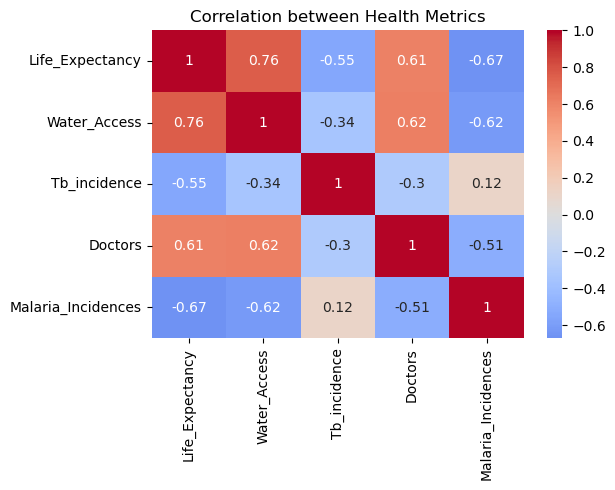

In [34]:
correlation_matrix = mergedata[['Life_Expectancy','Water_Access','Tb_incidence','Doctors','Malaria_Incidences']].corr()
#.corr() calculates pearson correlation

plt.figure(figsize=(6,4))                    #initializing blank plotting area with 6 in width and 4 in height

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)          
#(annot=True) to display actual correlation values in each cell
#theme coolwarm, uses blue and red colours for +ve and -ve correlations respectively. 
#center=0, setting the center of the scale at 0, no correlation occurs. 

plt.title('Correlation between Health Metrics')
#adding a title line to the heatmap

plt.show()

### Analyzing the Results 
#### Positive Correlation:
- Strongest: Life expectancy and Water Access are strongly linked. Poor access of water leads to many diseases.
- Life expectancy and Doctors. Better medical facilities lead to improved treatments and health conditions.
#### Negative Correlation:
- TB incidences with Water access and Life Expectancy.  
- Malaria incidences with Water access, the less clean water present the higher cases of malaria are reported due to increased mosquito breeding sites. 
- Malaria has the strongest correlation with Life expectancy, it increases the mortality rates. 
#### Moderate Correlation  
- TB and Malaria Incidences have a moderate Correlation with doctors. Healthcare resources are one of the factors. As better healthcare leads to improved prevention and treatment. 
#### No Correlation:
- TB incidences and Malaria Incidences rarely correlate. 
### Drawing Conclusions 
- Countries with better water access and more doctors are seen to have improved life expectancy. 
- Countries with higher TB and Malaria incidences have lower life expectancy.
- Countries with poor water access have higher rates of TB and Malaria incidence and lower rates of life expectancy.
- The correlation value of TB and Malaria Incidences is almost in the center, suggesting more doctors could prevent the no. of cases and vice versa.

### Analyzing disease prevalence across different regions
- Using a barplot to help us analyze which 10 countries have Highest and Lowest TB cases.

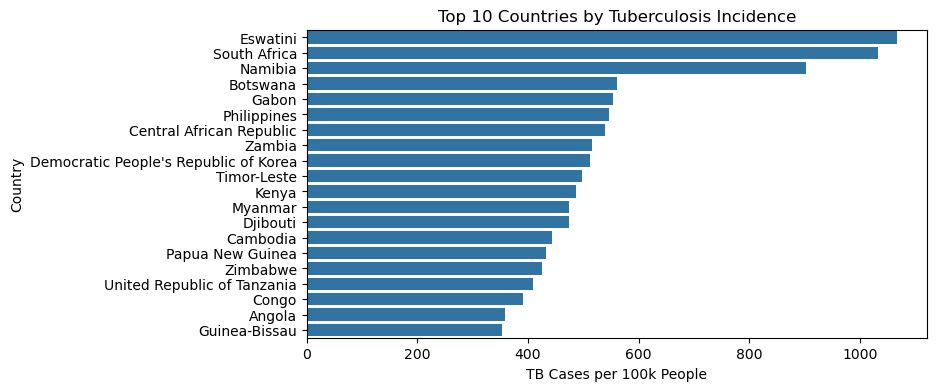

In [46]:
high_tb = mergedata.sort_values('Tb_incidence', ascending=False).head(20)
#sort_value sorts the dataset from highest to lowest 
#head(10), would fetch top 10 countries with hight tb cases

plt.figure(figsize=(8,4))          #plotting a figure
sns.barplot(x='Tb_incidence', y='Country', data=high_tb)
plt.title('Top 10 Countries by Tuberculosis Incidence')
plt.xlabel('TB Cases per 100k People')
plt.show()

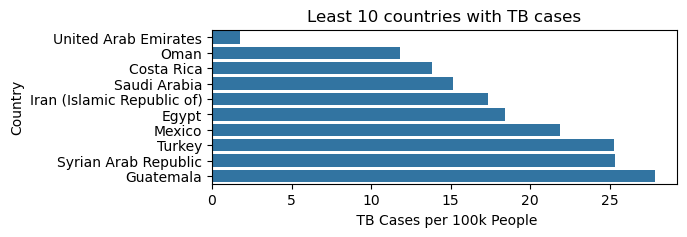

In [52]:
low_tb = mergedata.sort_values('Tb_incidence' , ascending=True).head(10)
#setting ascending to true arranges values from low to high. or we could let it stay false and fetch tail(10)
plt.figure(figsize=(6,2))
sns.barplot(x='Tb_incidence', y='Country', data=low_tb)
plt.title('Least 10 countries with TB cases')
plt.xlabel(' TB Cases per 100k People')
plt.show()

- Using a barplot to help us analyze which 10 countries have Highest and Lowest Malaria cases.

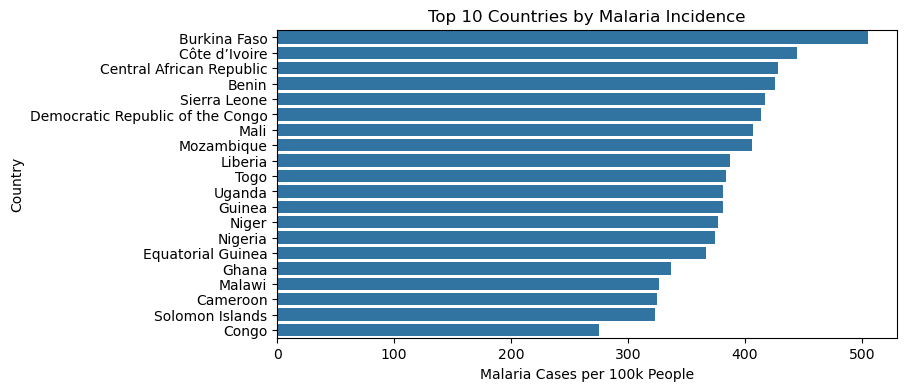

In [50]:
high_malaria = mergedata.sort_values('Malaria_Incidences', ascending=False).head(20)
#sort_value sorts the dataset from highest to lowest 
#head(20), would fetch top 20 countries with high malaria cases

plt.figure(figsize=(8,4))          #plotting a figure
sns.barplot(x='Malaria_Incidences', y='Country', data=high_malaria)
plt.title('Top 10 Countries by Malaria Incidence')
plt.xlabel('Malaria Cases per 100k People')
plt.show()

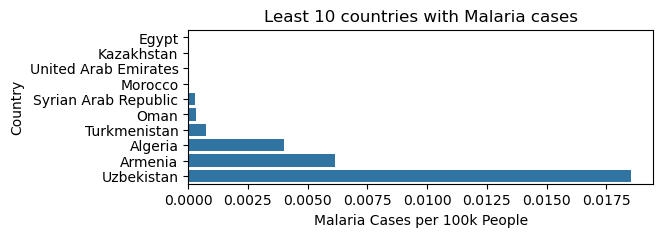

In [54]:
low_ml = mergedata.sort_values('Malaria_Incidences' , ascending=True).head(10)
#setting ascending to true arranges values from low to high. or we could let it stay false and fetch tail(10)
plt.figure(figsize=(6,2))
sns.barplot(x='Malaria_Incidences', y='Country', data=low_ml)
plt.title('Least 10 countries with Malaria cases')
plt.xlabel('Malaria Cases per 100k People')
plt.show()

### Socioeconomic Effect on Health
#### Malaria VS Water Access
- Poor water access often leads to contaminated water sources which are breeding sites for mosquitoes that transmit malaria.
- Better water access improves sanitation and reduces mosquito habitats.

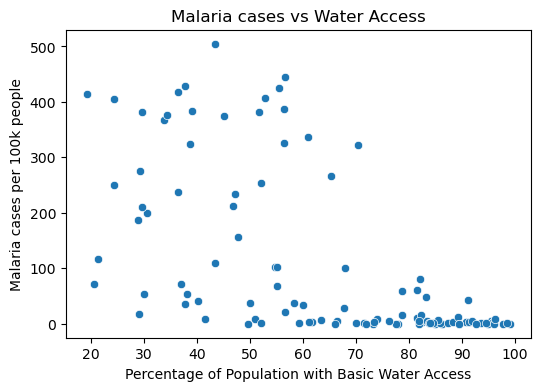

In [74]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Water_Access', y= 'Malaria_Incidences', data=mergedata)
plt.title('Malaria cases vs Water Access')
plt.xlabel('Percentage of Population with Basic Water Access')
plt.ylabel('Malaria cases per 100k people')
plt.show()

#### Analyses: Negatively Correlated
- As water access increases, malaria cases decrease


#### TB VS Water Access
- Water Access is a socioeconomic factor, countries with low water availability are less developed, poor, overcrowded, and poorly sanitised, which leads to a rise in TB cases. 
- WHO reports that countries with poor sanitation and poor access to water have higher rates of TB cases.
- Using a scatterplot to analyze the correlation between these two. 

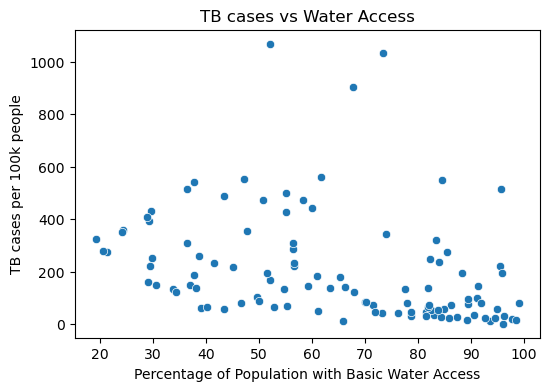

In [76]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Water_Access', y= 'Tb_incidence', data=mergedata)
plt.title('TB cases vs Water Access')
plt.xlabel('Percentage of Population with Basic Water Access')
plt.ylabel('TB cases per 100k people')
plt.show()

#### Analyses: Negative Correlation
- Negative correlation between Water Access and TB cases.
- It is seen that as Water Access increases, the number of TB cases decreases. 
- The decrease in Water Access shows an increase in the number of TB cases. 

### Effect of Health Care Resources on Diseases
#### Is there an impact of the number of doctors on Malaria cases?

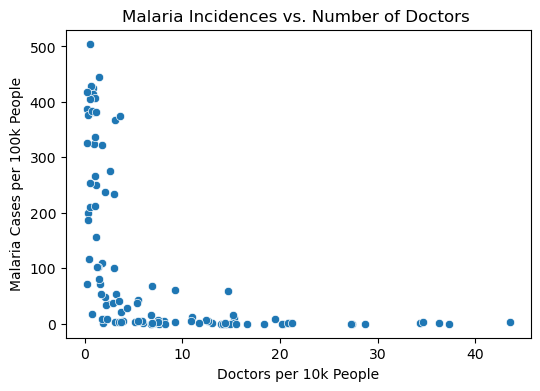

In [85]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Doctors', y='Malaria_Incidences', data=mergedata)
plt.title('Malaria Incidences vs. Number of Doctors ')
plt.xlabel('Doctors per 10k People')
plt.ylabel('Malaria Cases per 100k People')
plt.show()

#### Analyses: Negatively Correlated
- More doctors are linked with fewer malaria cases, leading to better diagnosis, treatment and prevention.
- Countries with more doctors have low malaria rates which means that better healthcare resources help control malaria. 

#### Do more doctors lower the rate of TB?

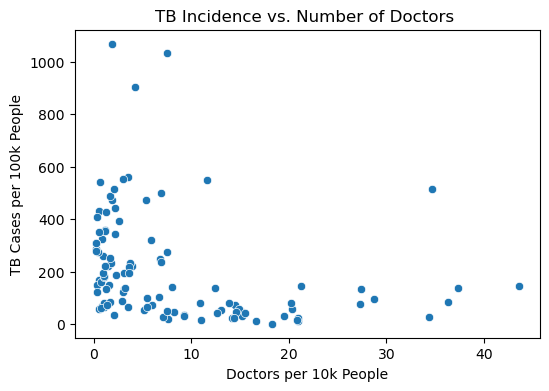

In [61]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Doctors', y='Tb_incidence', data=mergedata)
plt.title('TB Incidence vs. Number of Doctors ')
plt.xlabel('Doctors per 10k People')
plt.ylabel('TB Cases per 100k People')
plt.show()

### Analyses: From the plot 
- Countries with fewer doctors have high rates of TB.
- Countries with more doctors have low rates of TB.
- So, we can say that improvement of the medical and health facilities is positively correlated with less diseases.
- Improving healthcare resources positively impacts the medical conditions.
- But number of doctors is just one factor out of many. 

### Summarizing the Statistics

In [89]:
print("Summary Statistics:")
print(mergedata.describe())

Summary Statistics:
       Life_Expectancy  Water_Access  Tb_incidence     Doctors  \
count       107.000000    107.000000    107.000000  107.000000   
mean         66.279322     64.290429    206.348393    8.207315   
std           7.267238     22.897769    205.155437    9.546435   
min          49.171667     19.291111      1.789500    0.226000   
25%          60.200000     45.951944     59.750000    1.294314   
50%          66.227500     65.962941    139.350000    3.736000   
75%          72.190417     84.187222    282.250000   12.814375   
max          80.500000     99.015625   1067.850000   43.550435   

       Malaria_Incidences  
count          107.000000  
mean           106.993734  
std            149.863496  
min              0.000000  
25%              1.538421  
50%             15.663684  
75%            205.184211  
max            504.936842  


### Explaining the statistics:
#### count: Number of values in each column. 
- In this dataset, data of 107 countries used. 
#### Mean: Average of total values. 
- Life Expectancy: 66.27 years.
- Water Access: 64.29 %.
- TB cases: 206.34 cases per 100k people.
- Doctors: 8.2 per 10k people.
- Malaria cases: 106.99 cases per 100k people. 
#### std: Indicating variability across countries.
- A higher std indicates more variability.
#### min: Smallest value in each column. 
- 25 % : value below which 25 % of data falls.
- 50 % : value below which 50 % of data falls.
- 75 % : value below which 75 % of data falls.
#### max: Highest value in each column. 